In [11]:
pwd

'C:\\Users\\K C Wong\\OneDrive\\Documents\\E-learning\\Coursera\\PROF CERT - IBM ML\\2\\Supervised ML - Reg\\Final Project'

In [34]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import scipy

In [35]:
# !pip install pingouin

'''
Run via Anaconda Prompt (Anaconda3) as a Administrator
'''

'\nRun via Anaconda Prompt (Anaconda3) as a Administrator\n'

In [36]:
#https://www.kaggle.com/questions-and-answers/118932

pd.options.display.max_rows
# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

pd.options.display.max_columns
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [50]:
diabetes_df = pd.read_csv("archive/diabetes.csv",decimal=",")
diabetes_df.tail(10)

patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
380             381          157       92        47             3.3   80   
381             382          252      161        87             2.9   80   
382             383          271      121        40             6.8   81   
383             384          240       88        49             4.9   82   
384             385          255      112        34             7.5   82   
385             386          227      105        44             5.2   83   
386             387          226      279        52             4.3   84   
387             388          301       90       118             2.6   89   
388             389          232      184       114             2.0   91   
389             390          165       94        69             2.4   92   

     gender  height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
380    male      71     212  29.6          156            88     47   48   
381  female      62     162  29.6          160           100     44   41   
382  female      64     158  27.1          146            76     36   43   
383  female      63     170  30.1          180            86     41   46   
384    male      66     163  26.3          179            89     37   43   
385  female      59     125  25.2          150            90     35   40   
386  female      60     192  37.5          144            88     41   48   
387  female      61     115  21.7          218            90     31   41   
388  female      61     127  24.0          170            82     35   38   
389  female      62     217  39.7          160            82     51   51   

     waist_hip_ratio     diabetes  
380             0.98  No diabetes  
381             1.07     Diabetes  
382             0.84  No diabetes  
383             0.89  No diabetes  
384             0.86  No diabetes  
385             0.88  No diabetes  
386             0.85     Diabetes  
387             0.76  No diabetes  
388             0.92     Diabetes  
389             1.00  No diabetes

In [38]:
### BEGIN SOLUTION
# Number of rows
print(diabetes_df.shape[0])

# Column names
print(diabetes_df.columns.tolist())

# Data types
print(diabetes_df.dtypes)
### END SOLUTION

390
['patient_number', 'cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio', 'diabetes']
patient_number       int64
cholesterol          int64
glucose              int64
hdl_chol             int64
chol_hdl_ratio     float64
age                  int64
gender              object
height               int64
weight               int64
bmi                float64
systolic_bp          int64
diastolic_bp         int64
waist                int64
hip                  int64
waist_hip_ratio    float64
diabetes            object
dtype: object


In [39]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = diabetes_df.duplicated().sum()

print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


0

In [40]:
result = diabetes_df.groupby('patient_number')['weight'].nunique()
print(result[result>1])

Series([], Name: weight, dtype: int64)


In [41]:
df2=diabetes_df.copy()
df2.drop(['patient_number'], axis = 1,inplace=True)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cholesterol      390 non-null    int64  
 1   glucose          390 non-null    int64  
 2   hdl_chol         390 non-null    int64  
 3   chol_hdl_ratio   390 non-null    float64
 4   age              390 non-null    int64  
 5   gender           390 non-null    object 
 6   height           390 non-null    int64  
 7   weight           390 non-null    int64  
 8   bmi              390 non-null    float64
 9   systolic_bp      390 non-null    int64  
 10  diastolic_bp     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  waist_hip_ratio  390 non-null    float64
 14  diabetes         390 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 45.8+ KB


C:\Users\K C Wong\.conda\envs\pycaret_env\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  
C:\Users\K C Wong\.conda\envs\pycaret_env\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if __name__ == '__main__':


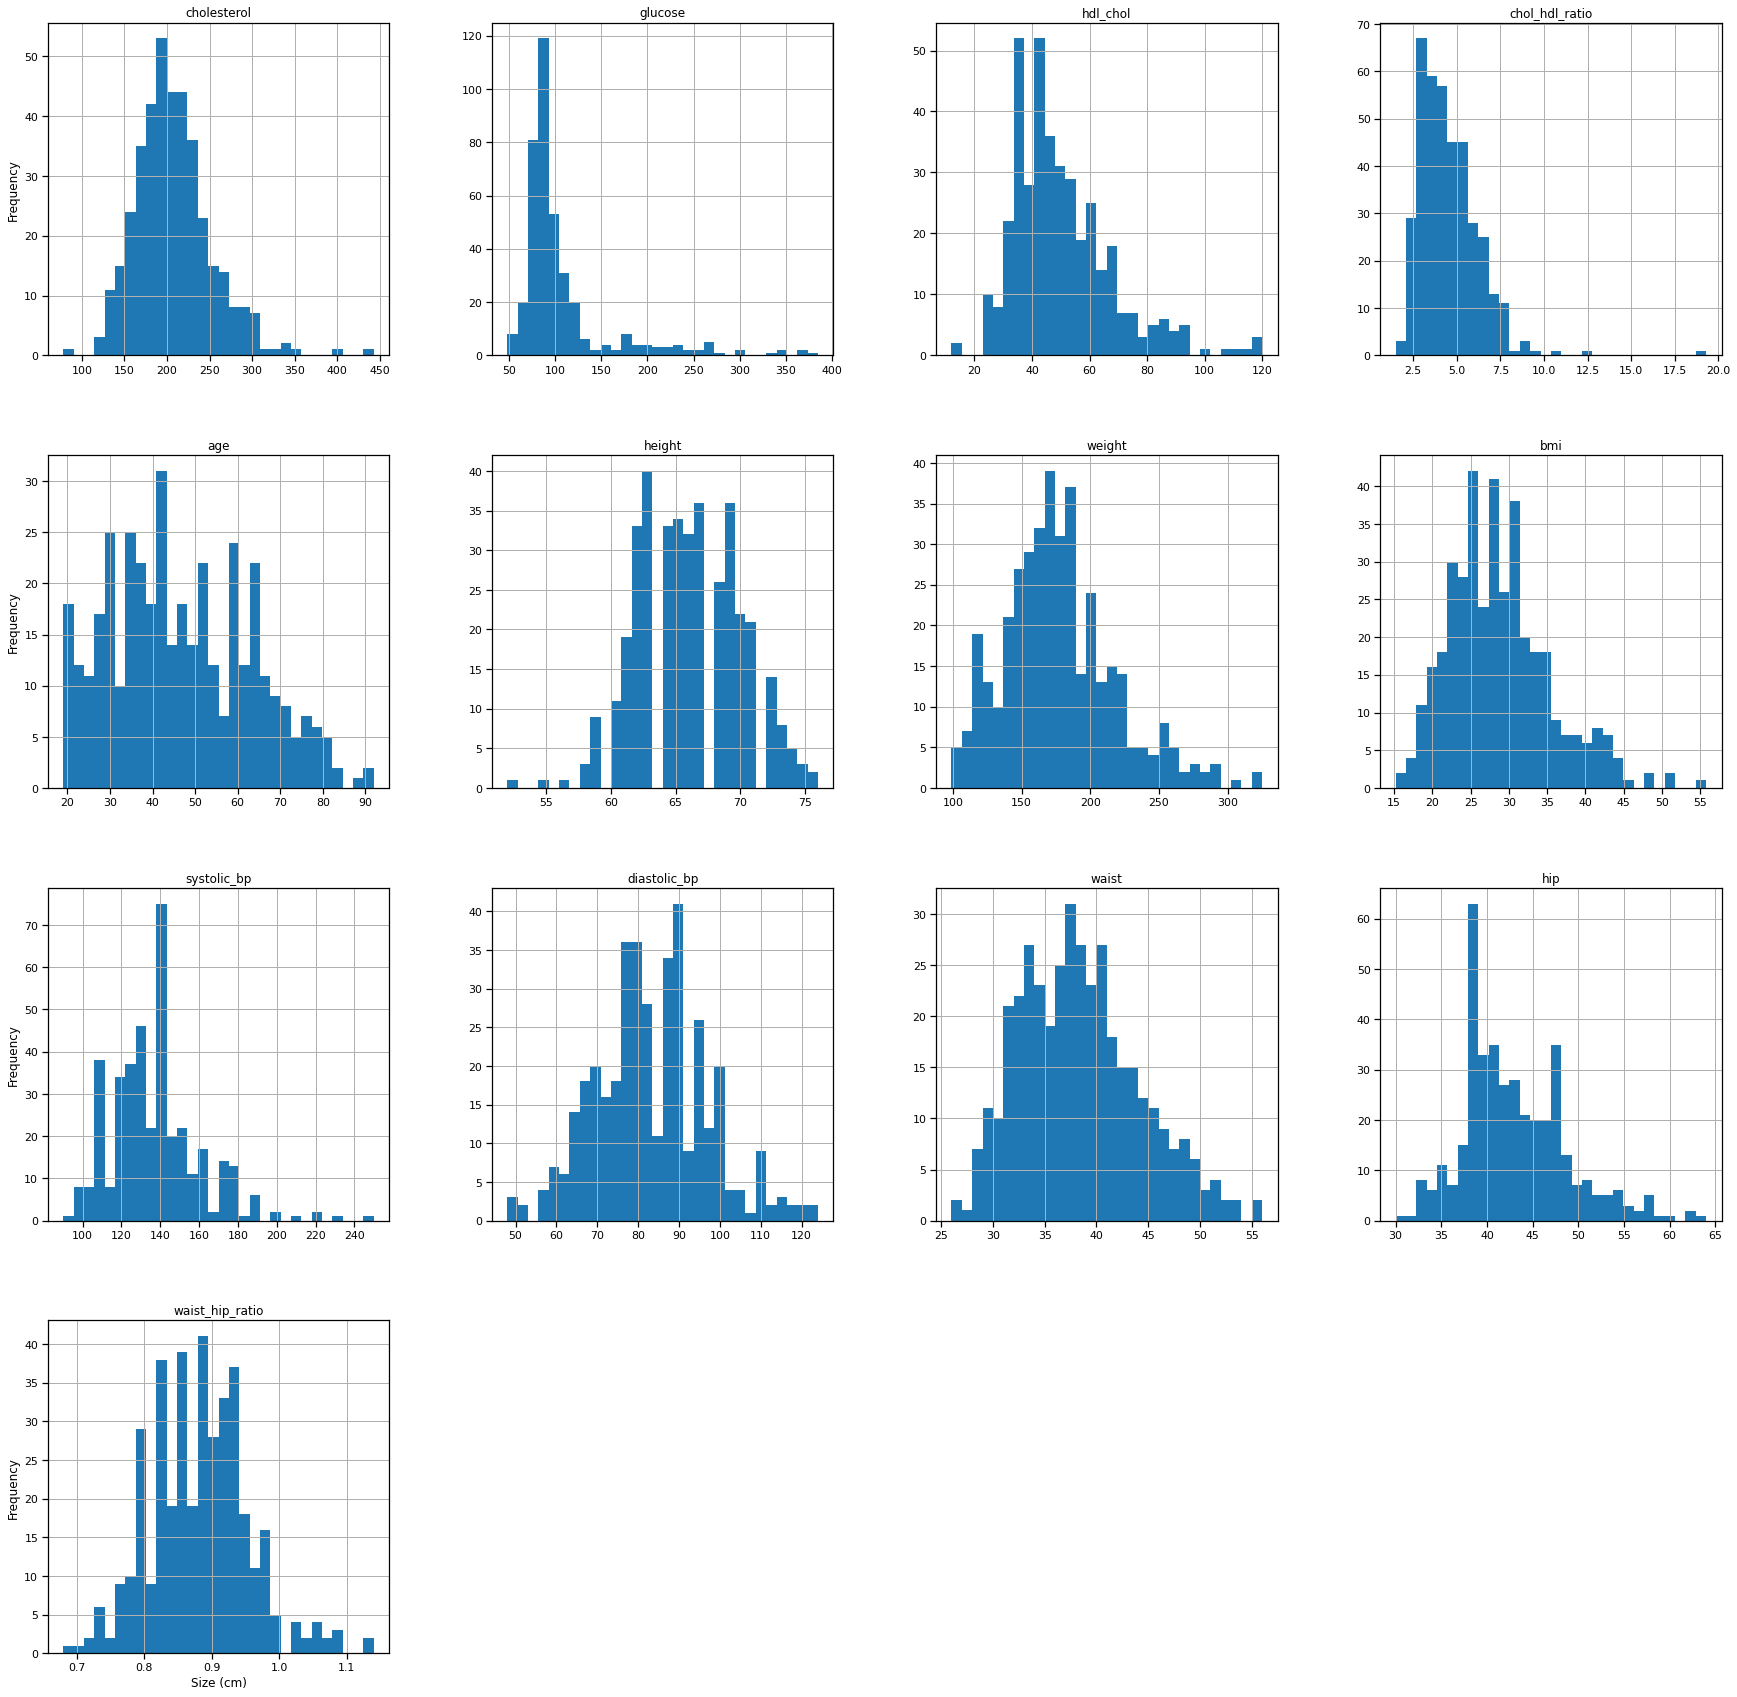

In [43]:
# To create four separate plots, use Pandas `.hist` method
axList = df2.hist(bins=30,figsize=(30,30))

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
### END SOLUTION

In [44]:
## Examine the columns, look at missing data
print(df2.info())
print()
desc=pd.DataFrame(diabetes_df.describe())
print(desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cholesterol      390 non-null    int64  
 1   glucose          390 non-null    int64  
 2   hdl_chol         390 non-null    int64  
 3   chol_hdl_ratio   390 non-null    float64
 4   age              390 non-null    int64  
 5   gender           390 non-null    object 
 6   height           390 non-null    int64  
 7   weight           390 non-null    int64  
 8   bmi              390 non-null    float64
 9   systolic_bp      390 non-null    int64  
 10  diastolic_bp     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  waist_hip_ratio  390 non-null    float64
 14  diabetes         390 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 45.8+ KB
None

       patient_number  cholesterol     gluc

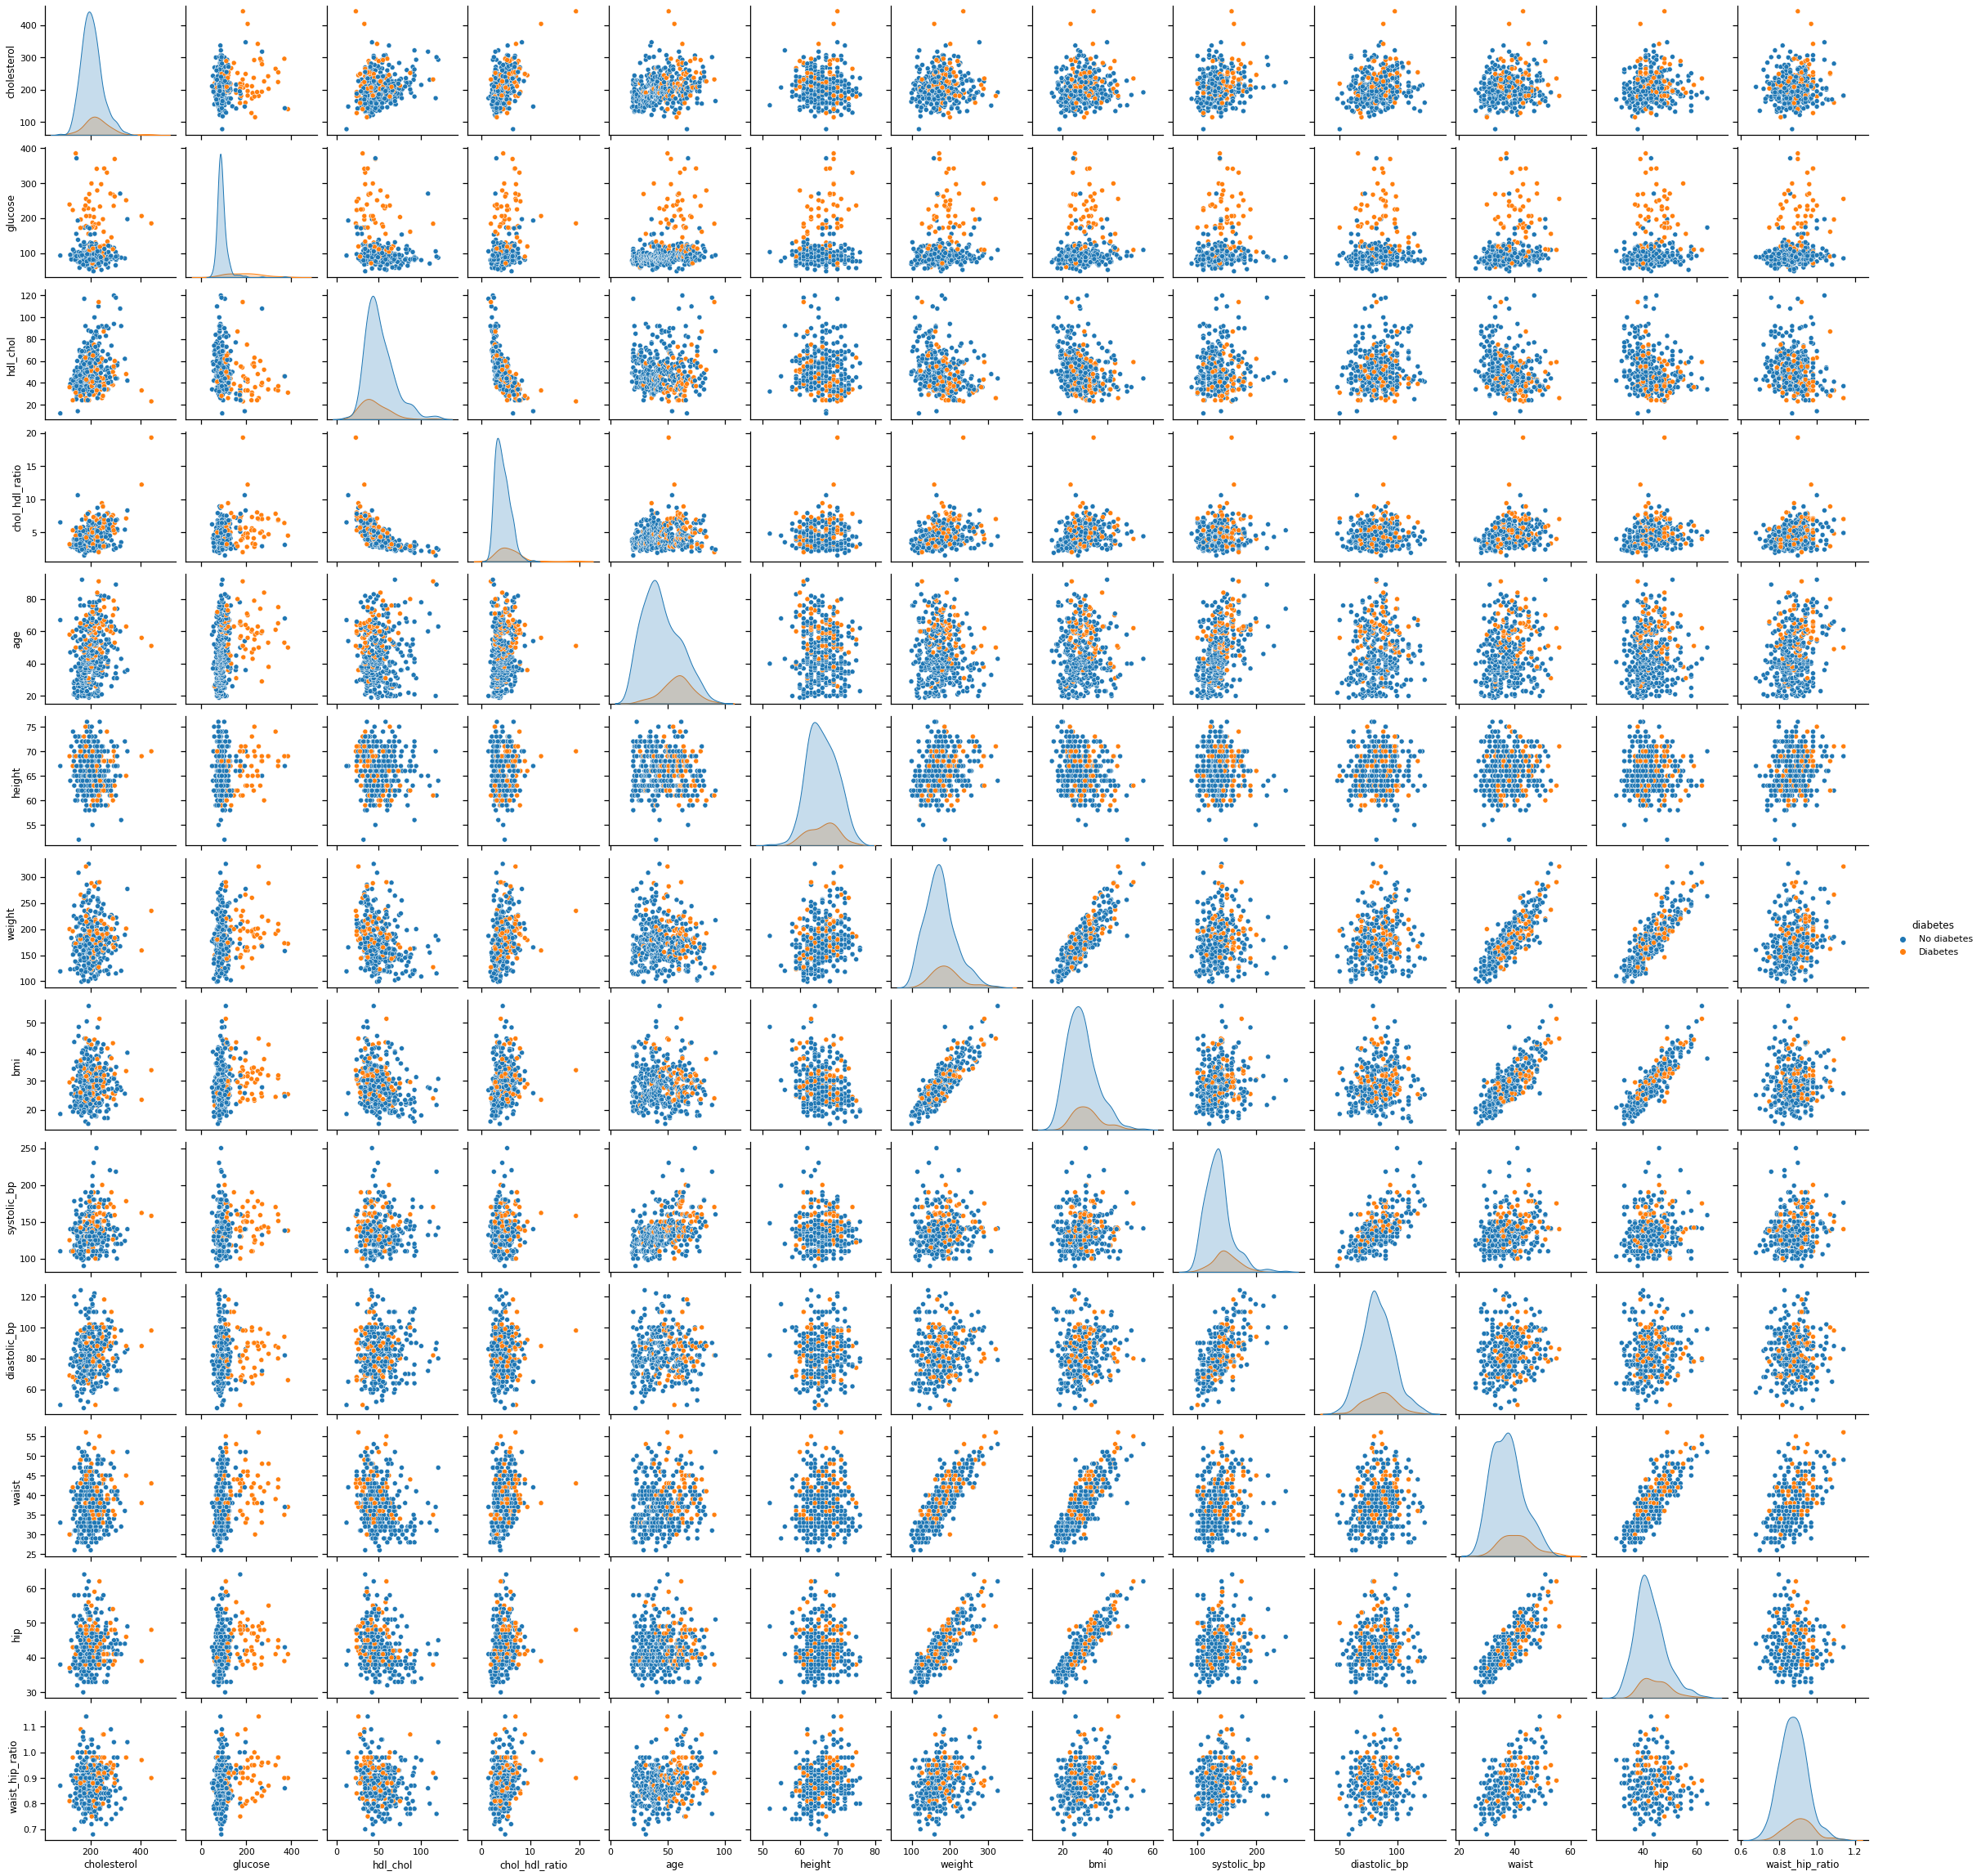

In [45]:
### BEGIN SOLUTION
sns.set_context('notebook')
#sns.set_context('talk')
sns.pairplot(df2, hue='diabetes')
### END SOLUTION

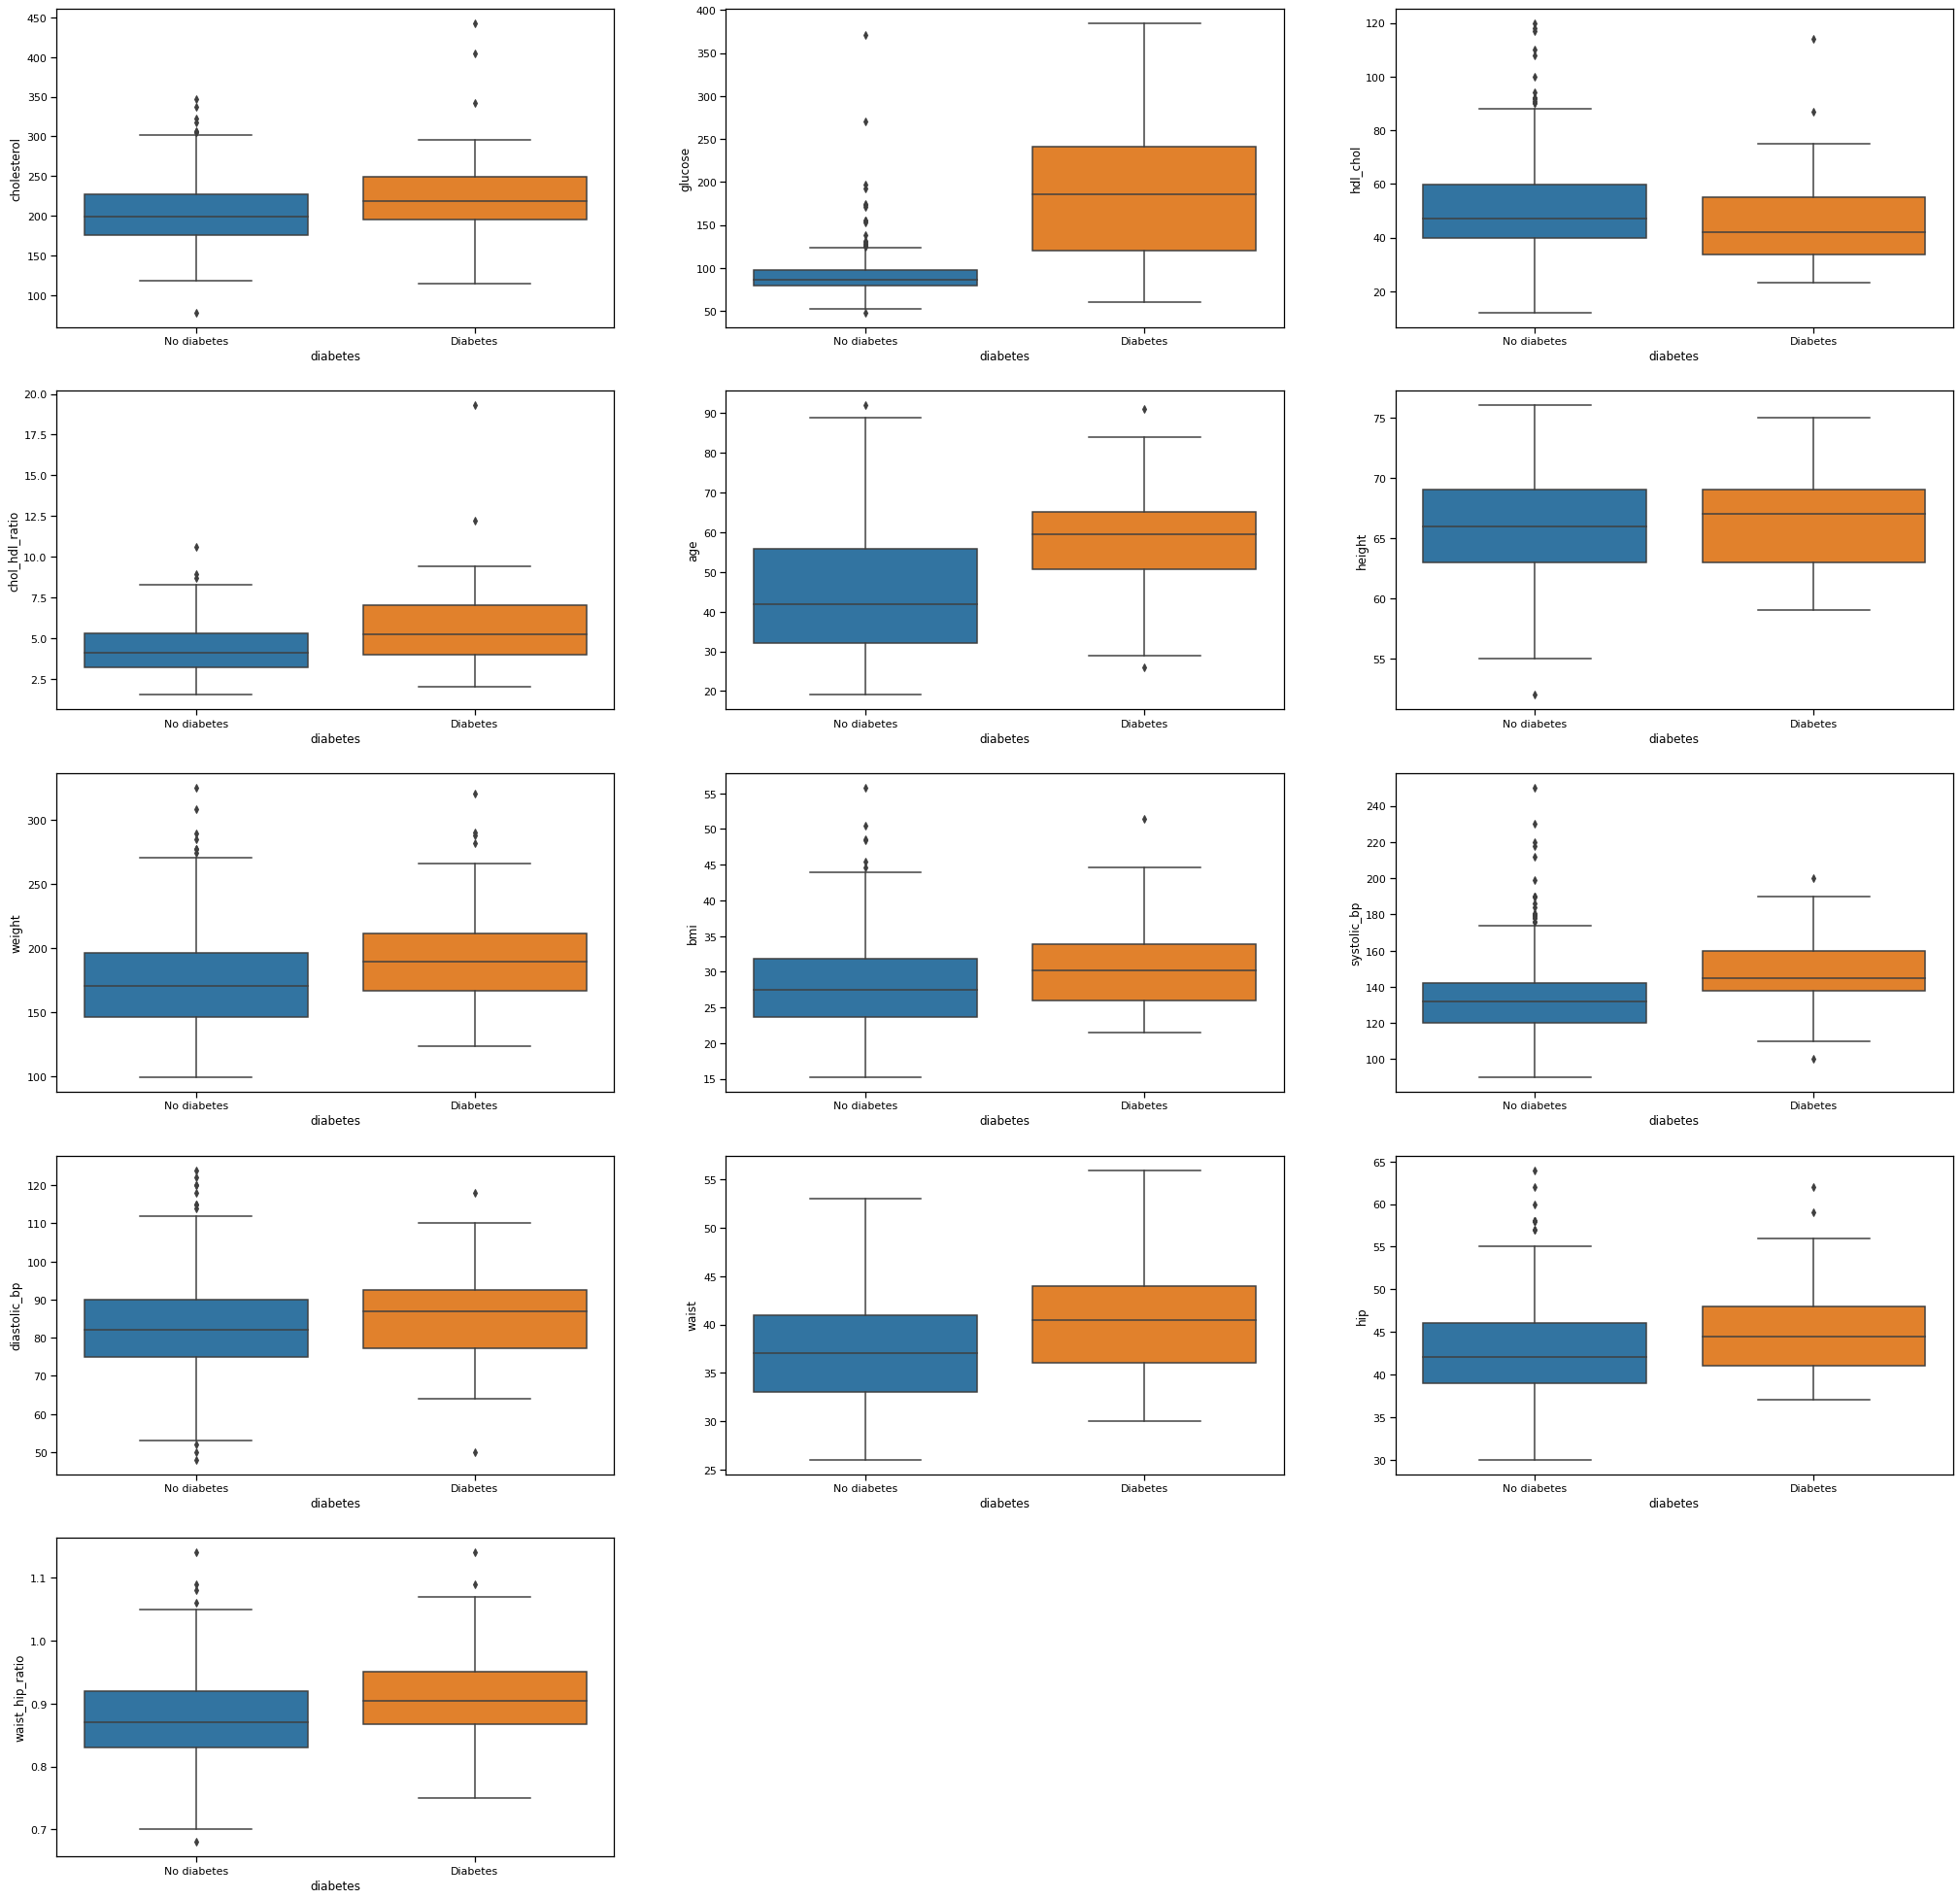

In [46]:
### BEGIN SOLUTION
# Here we have four separate plots
#diabetes_df.boxplot(by='diabetes');
### END SOLUTION

#ax = sns.boxplot(data=diabetes_df, orient="h", palette="Set2")

'''
sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="box",
                height=4, aspect=.7);
'''


'''
['patient_number', 'cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 
'gender', 'height', 'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist', 'hip', 
'waist_hip_ratio', 'diabetes']
'''

fig, axes = plt.subplots(5,3,figsize=(35, 35))

sns.boxplot(x=df2['diabetes'], y=df2['cholesterol'], orient='v', ax=axes[0,0])
sns.boxplot(x=df2['diabetes'], y=df2['glucose'], orient='v', ax=axes[0,1])
sns.boxplot(x=df2['diabetes'], y=df2['hdl_chol'], orient='v', ax=axes[0,2])

sns.boxplot(x=df2['diabetes'], y=df2['chol_hdl_ratio'], orient='v', ax=axes[1,0])
sns.boxplot(x=df2['diabetes'], y=df2['age'], orient='v', ax=axes[1,1])
sns.boxplot(x=df2['diabetes'], y=df2['height'], orient='v', ax=axes[1,2])

sns.boxplot(x=df2['diabetes'], y=df2['weight'], orient='v', ax=axes[2,0])
sns.boxplot(x=df2['diabetes'], y=df2['bmi'], orient='v', ax=axes[2,1])
sns.boxplot(x=df2['diabetes'], y=df2['systolic_bp'], orient='v', ax=axes[2,2])

sns.boxplot(x=df2['diabetes'], y=df2['diastolic_bp'], orient='v', ax=axes[3,0])
sns.boxplot(x=df2['diabetes'], y=df2['waist'], orient='v', ax=axes[3,1])
sns.boxplot(x=df2['diabetes'], y=df2['hip'], orient='v', ax=axes[3,2])

sns.boxplot(x=df2['diabetes'], y=df2['waist_hip_ratio'], orient='v', ax=axes[4,0])

fig.delaxes(axes[4][1])
fig.delaxes(axes[4][2])

plt.show()

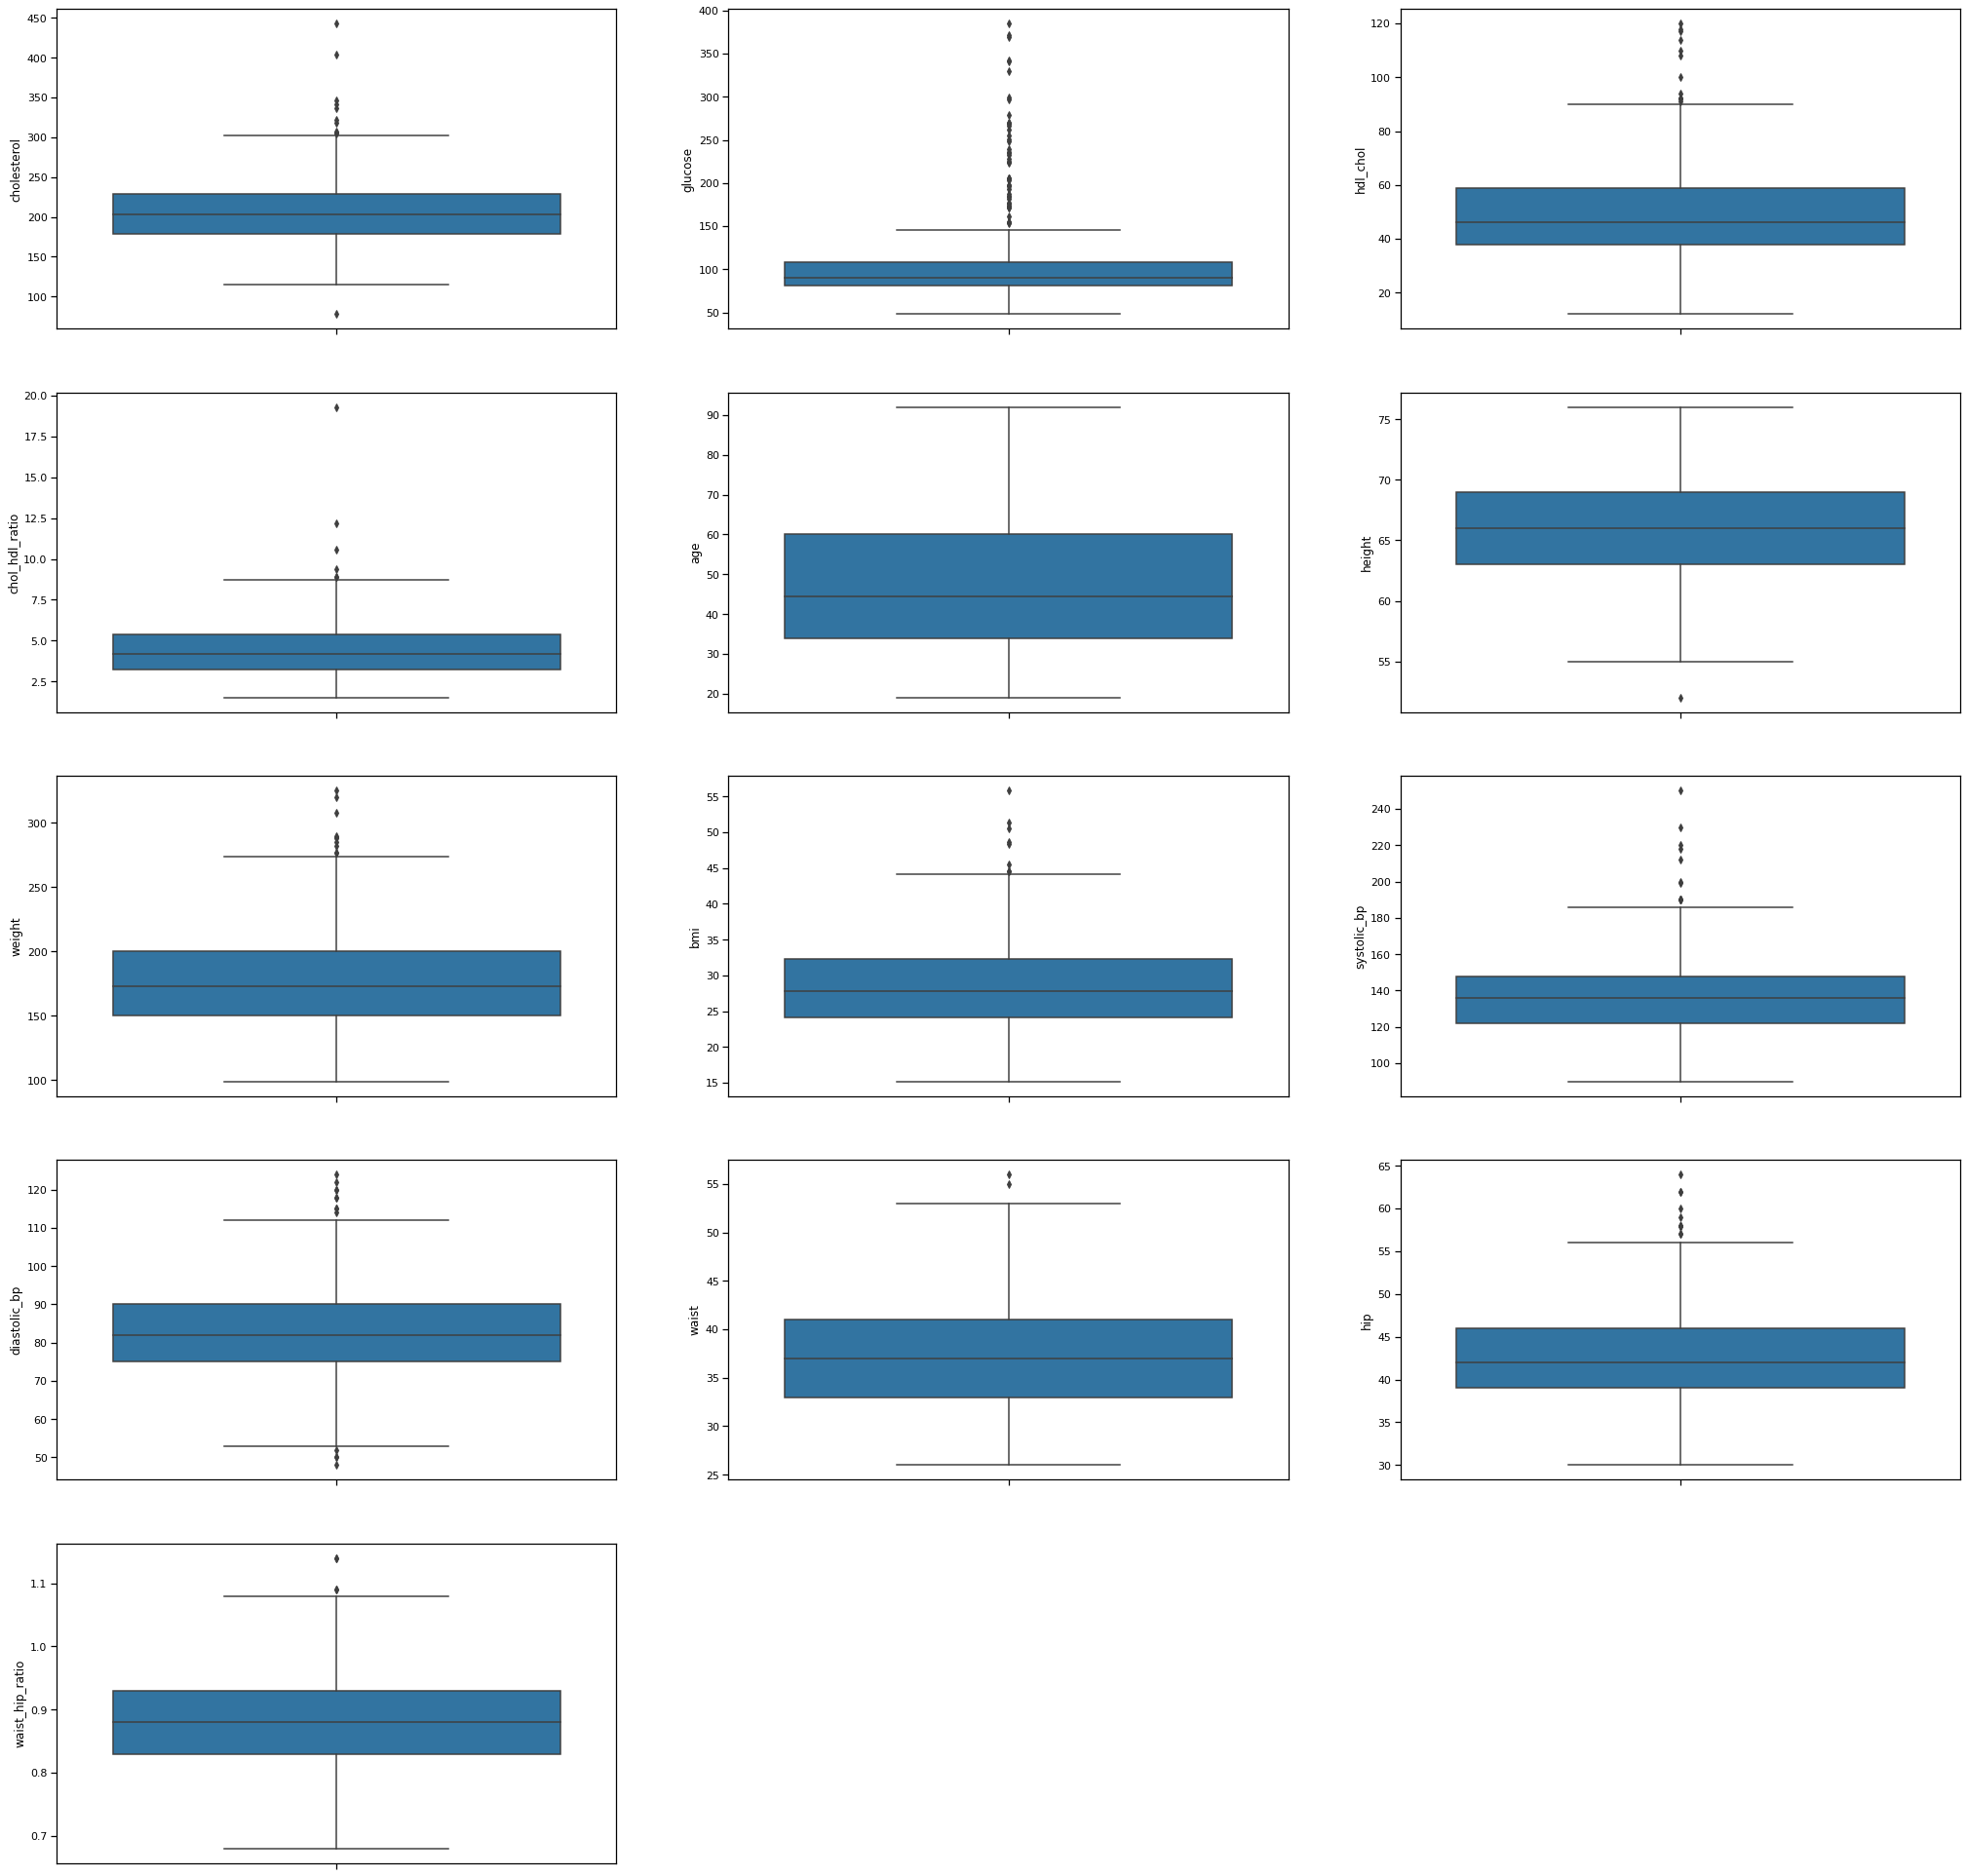

In [270]:
fig, axes = plt.subplots(5,3,figsize=(35, 35))

sns.boxplot(y=df2['cholesterol'], orient='v', ax=axes[0,0])
sns.boxplot(y=df2['glucose'], orient='v', ax=axes[0,1])
sns.boxplot(y=df2['hdl_chol'], orient='v', ax=axes[0,2])

sns.boxplot(y=df2['chol_hdl_ratio'], orient='v', ax=axes[1,0])
sns.boxplot(y=df2['age'], orient='v', ax=axes[1,1])
sns.boxplot(y=df2['height'], orient='v', ax=axes[1,2])

sns.boxplot(y=df2['weight'], orient='v', ax=axes[2,0])
sns.boxplot(y=df2['bmi'], orient='v', ax=axes[2,1])
sns.boxplot(y=df2['systolic_bp'], orient='v', ax=axes[2,2])

sns.boxplot(y=df2['diastolic_bp'], orient='v', ax=axes[3,0])
sns.boxplot(y=df2['waist'], orient='v', ax=axes[3,1])
sns.boxplot(y=df2['hip'], orient='v', ax=axes[3,2])

sns.boxplot(y=df2['waist_hip_ratio'], orient='v', ax=axes[4,0])

fig.delaxes(axes[4][1])
fig.delaxes(axes[4][2])

plt.show()

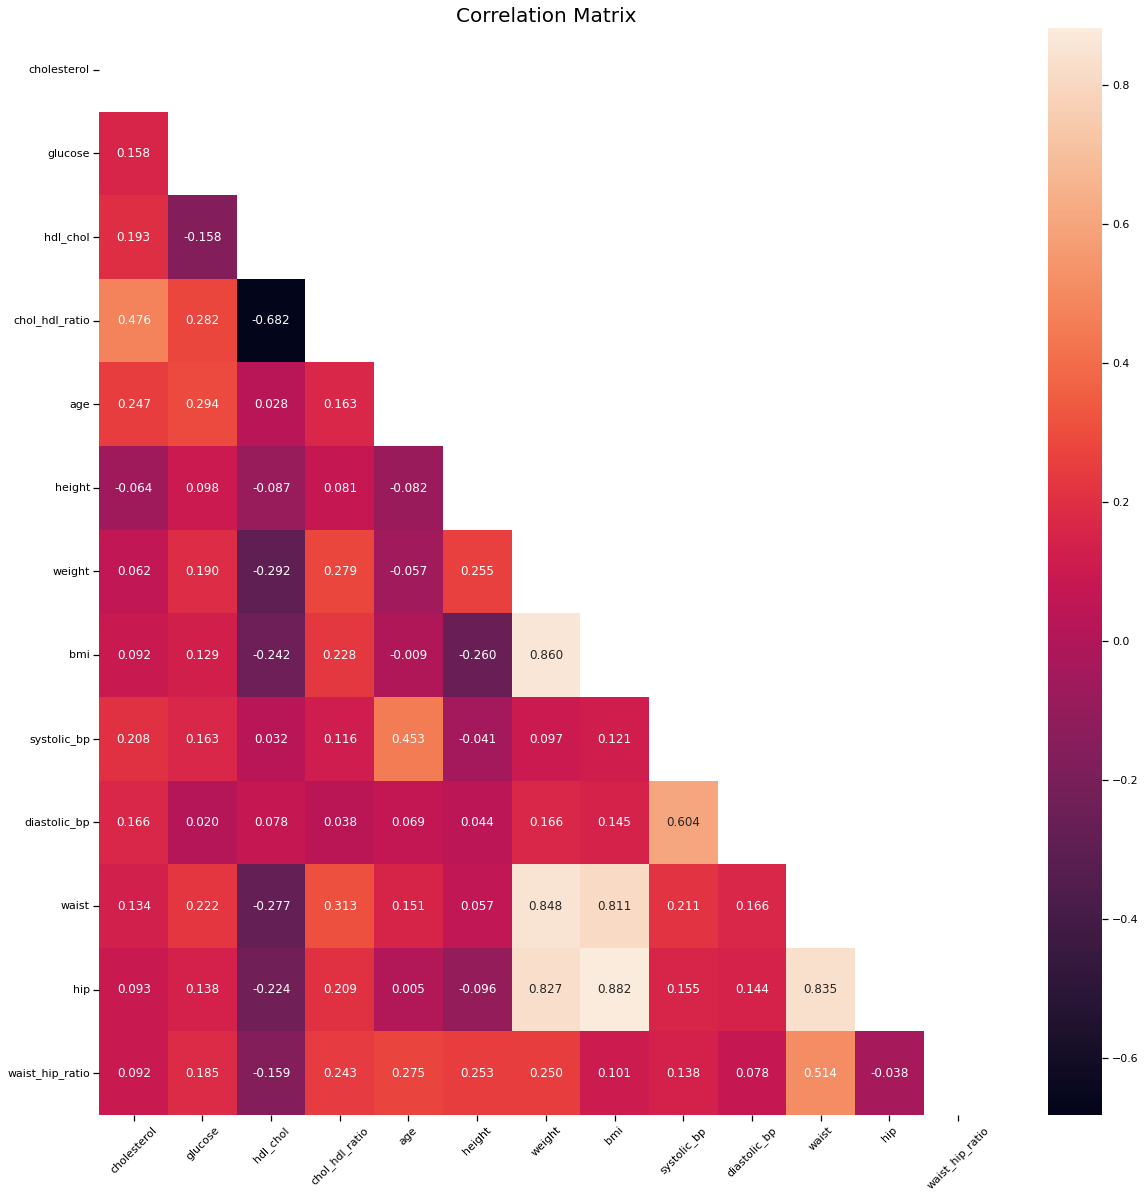

In [265]:
temp=diabetes_df.drop('patient_number',axis=1)
corr_matrix=temp.corr()
plt.figure(figsize=(20,20))
mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,annot=True, fmt='0.3f',mask=mask)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

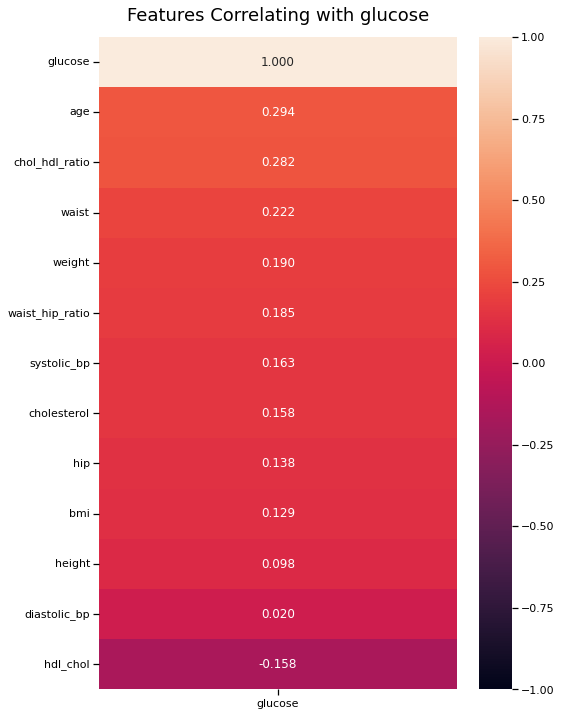

In [266]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr_matrix[['glucose']].sort_values(by='glucose', ascending=False), vmin=-1, vmax=1, annot=True,fmt='0.3f')
heatmap.set_title('Features Correlating with glucose', fontdict={'fontsize':18}, pad=16)
plt.show()

In [267]:
b

gender                     female        male
cholesterol     count  228.000000  162.000000
                mean   208.364035  205.635802
                std     44.147968   45.474552
                min    118.000000   78.000000
                25%    179.000000  179.000000
                50%    204.000000  201.500000
                75%    231.250000  228.000000
                max    443.000000  404.000000
glucose         count  228.000000  162.000000
                mean   103.109649  113.290123
                std     44.073640   64.754739
                min     52.000000   48.000000
                25%     81.000000   81.000000
                50%     90.000000   89.500000
                75%    105.250000  112.000000
                max    299.000000  385.000000
hdl_chol        count  228.000000  162.000000
                mean    51.842105   48.049383
                std     17.214674   17.178205
                min     14.000000   12.000000
                25%     41.000000   34.000000
                50%     47.000000   44.000000
                75%     59.000000   59.000000
                max    120.000000  117.000000
chol_hdl_ratio  count  228.000000  162.000000
                mean     4.374123    4.736420
                std      1.720846    1.741947
                min      1.900000    1.500000
                25%      3.275000    3.200000
                50%      4.100000    4.550000
                75%      5.100000    5.800000
                max     19.300000   12.200000
age             count  228.000000  162.000000
                mean    45.609649   48.413580
                std     16.720066   15.934511
                min     19.000000   20.000000
                25%     32.000000   36.000000
                50%     43.000000   48.000000
                75%     59.000000   61.750000
                max     92.000000   82.000000
height          count  228.000000  162.000000
                mean    63.714912   69.098765
                std      2.862848    2.915390
                min     52.000000   55.000000
                25%     62.000000   67.000000
                50%     63.000000   69.000000
                75%     65.000000   71.000000
                max     75.000000   76.000000
weight          count  228.000000  162.000000
                mean   174.276316  181.814815
                std     41.363202   38.721529
                min     99.000000  100.000000
                25%    145.000000  159.000000
                50%    170.000000  178.500000
                75%    199.250000  200.000000
                max    325.000000  320.000000
bmi             count  228.000000  162.000000
                mean    30.188158   26.787654
                std      6.932531    5.541921
                min     16.000000   15.200000
                25%     25.275000   23.100000
                50%     29.400000   25.900000
                75%     34.000000   30.100000
                max     55.800000   45.500000
systolic_bp     count  228.000000  162.000000
                mean   136.451754  138.092593
                std     24.958509   19.562864
                min     90.000000  100.000000
                25%    120.000000  124.000000
                50%    133.500000  138.000000
                75%    146.000000  148.000000
                max    250.000000  199.000000
diastolic_bp    count  228.000000  162.000000
                mean    82.482456   84.425926
                std     13.567409   13.359253
                min     48.000000   50.000000
                25%     72.000000   76.000000
                50%     82.000000   83.000000
                75%     90.000000   92.000000
                max    124.000000  122.000000
waist           count  228.000000  162.000000
                mean    38.092105   37.555556
                std      6.011394    5.391505
                min     26.000000   27.000000
                25%     33.000000   34.000000
                50%     38.000000   37.00000

In [269]:
temp.describe()

cholesterol     glucose    hdl_chol  chol_hdl_ratio         age  \
count   390.000000  390.000000  390.000000      390.000000  390.000000   
mean    207.230769  107.338462   50.266667        4.524615   46.774359   
std      44.666005   53.798188   17.279069        1.736634   16.435911   
min      78.000000   48.000000   12.000000        1.500000   19.000000   
25%     179.000000   81.000000   38.000000        3.200000   34.000000   
50%     203.000000   90.000000   46.000000        4.200000   44.500000   
75%     229.000000  107.750000   59.000000        5.400000   60.000000   
max     443.000000  385.000000  120.000000       19.300000   92.000000   

           height      weight         bmi  systolic_bp  diastolic_bp  \
count  390.000000  390.000000  390.000000   390.000000    390.000000   
mean    65.951282  177.407692   28.775641   137.133333     83.289744   
std      3.918867   40.407824    6.600915    22.859528     13.498192   
min     52.000000   99.000000   15.200000    90.000000     48.000000   
25%     63.000000  150.250000   24.100000   122.000000     75.000000   
50%     66.000000  173.000000   27.800000   136.000000     82.000000   
75%     69.000000  200.000000   32.275000   148.000000     90.000000   
max     76.000000  325.000000   55.800000   250.000000    124.000000   

            waist         hip  waist_hip_ratio  
count  390.000000  390.000000       390.000000  
mean    37.869231   42.992308         0.881385  
std      5.760947    5.664342         0.073212  
min     26.000000   30.000000         0.680000  
25%     33.000000   39.000000         0.830000  
50%     37.000000   42.000000         0.880000  
75%     41.000000   46.000000         0.930000  
max     56.000000   64.000000         1.140000

# Supervised ML - Regression

## i. Base model

In [25]:
# 02b_LAB_Regression_Train_Test_Split.ipynb

# Select the object (string) columns
mask = df2.dtypes == np.object
categorical_cols = df2.columns[mask]

print(mask)
print(categorical_cols)

cholesterol        False
glucose            False
hdl_chol           False
chol_hdl_ratio     False
age                False
gender              True
height             False
weight             False
bmi                False
systolic_bp        False
diastolic_bp       False
waist              False
hip                False
waist_hip_ratio    False
diabetes            True
dtype: bool
Index(['gender', 'diabetes'], dtype='object')


In [26]:
# Determine how many extra columns would be created
num_ohc_cols = (df2[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

2

In [27]:
num_ohc_cols

gender      2
diabetes    2
dtype: int64

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = df2.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    new_dat = ohc.fit_transform(data_ohc[[col]])
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    cats=ohc.categories_
    
    new_cols=['_'.join([col,cat]) for cat in cats[0]]
    
    new_df=pd.DataFrame(new_dat.toarray(),columns=new_cols)
    
    data_ohc=pd.concat([data_ohc,new_df],axis=1)

In [29]:
data_ohc.shape[1]-df2.shape[1]

2

In [30]:
data_ohc

cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  height  weight  \
0            193       77        49             3.9   19      61     119   
1            146       79        41             3.6   19      60     135   
2            217       75        54             4.0   20      67     187   
3            226       97        70             3.2   20      64     114   
4            164       91        67             2.4   20      70     141   
5            170       69        64             2.7   20      64     161   
6            149       77        49             3.0   20      62     115   
7            164       71        63             2.6   20      72     145   
8            230      112        64             3.6   20      67     159   
9            179      105        60             3.0   20      58     170   
10           174      105       117             1.5   20      70     187   
11           193      106        63             3.1   20      68     274   
12           132       99        34             3.9   21      65     169   
13           203       84        75             2.7   21      63     142   
14           135       88        47             2.9   21      69     155   
15           187       84        64             2.9   21      63     158   
16           244       89        92             2.7   21      71     163   
17           193       75        49             3.9   21      61     220   
18           165       76        46             3.6   22      63     114   
19           172       70        36             4.8   22      64     148   
20           217       81        60             3.6   22      71     223   
21           223       75        85             2.6   22      62     137   
22           136       81        51             2.7   22      66     160   
23           175       91        42             4.2   23      65     235   
24           230       86        37             6.2   23      71     277   
25           147       78        42             3.5   23      61     185   
26           229       91        43             5.3   23      72     180   
27           179       75        36             5.0   23      65     183   
28           185       76        58             3.2   23      76     164   
29           164       86        40             4.1   23      69     245   
30           228       66        45             5.1   24      61     113   
31           199       87        63             3.2   25      66     118   
32           134      101        36             3.7   25      63     245   
33           169      104        58             2.9   25      60     154   
34           227       98        66             3.4   25      71     162   
35           149      138        50             3.0   26      62     174   
36           155       58        69             2.2   26      73     174   
37           179       90        60             3.0   26      60     130   
38           283       83        74             3.8   26      72     227   
39           228       79        37             6.2   26      72     259   
40           220       60        66             3.3   26      70     150   
41           170       76        60             2.8   27      63     119   
42           201      100        46             4.4   27      65     145   
43           238       75        36             6.6   27      60     170   
44           190       92        44             4.3   27      65     210   
45           203       94        62             3.3   27      67     209   
46           226      100        65             3.5   27      69     289   
47           204       62        70             2.9   27      67     185   
48           166       77        68             2.4   27      72     141   
49           241       92        40             6.0   27      63     179   
50           164       94        58             2.8   28      67     180   
51           214      111        59             3.6  

In [ ]:
print(num_ohc_cols)
print()
print(num_ohc_cols.index)

In [ ]:
#print(diabetes_df[1])

#diabetes_df=diabetes_df.drop(num_ohc_cols.index,axis=1)

#print(diabetes_df.shape[1])

In [31]:
'''
df2.rename({'gender': 'female'}, axis=1,inplace=True)

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, OneHotEncoder
lb, le = LabelBinarizer(), LabelEncoder()

df2['female'] = 1 - lb.fit_transform(df2['female'])
df2['diabetes'] = 1 - lb.fit_transform(df2['diabetes'])
    
df2.tail(10)

'''

"\ndf2.rename({'gender': 'female'}, axis=1,inplace=True)\n\nfrom sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, OneHotEncoder\nlb, le = LabelBinarizer(), LabelEncoder()\n\ndf2['female'] = 1 - lb.fit_transform(df2['female'])\ndf2['diabetes'] = 1 - lb.fit_transform(df2['diabetes'])\n    \ndf2.tail(10)\n\n"

In [32]:
print(df2.shape[1])

# Remove the string columns from the dataframe
df2 = df2.drop(num_ohc_cols.index, axis=1)

print(df2.shape[1])

15
13


In [ ]:
from sklearn.model_selection import train_test_split

y_col = 'glucose'

# Split the data that is not one-hot encoded
feature_cols = [x for x in df2.columns if x != y_col]
X_data = df2[feature_cols]
y_data = df2[y_col]

print(feature_cols)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [ ]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

In [ ]:
X_train.tail()

In [ ]:
X_train_ohc.tail()

In [ ]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.4)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Glucose Predictions vs Truth, using Linear Regression');

In [ ]:
y_test

In [ ]:
pd.DataFrame(y_test_pred);

In [ ]:
# 02d_DEMO_Regularization_and_Gradient_Descent.ipynb

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import pandas as pd
import numpy as np

In [ ]:
#X_real = diabetes_df[['age']]
#Y_real = diabetes_df[['glucose']]

In [ ]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

print(diabetes_df.set_index('age')['glucose'])

# Plot of the noisy (sparse)
ax = diabetes_df.set_index('age')['glucose']
ax.plot(ls='', marker='o', label='data')
#ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
#ax.set(xlabel='x data', ylabel='y data')

plt.show()

#### 02e_LAB_Regularization.ipynb

In [ ]:
# Create polynomial features

from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=42)

# https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

In [204]:
diabetes_df = pd.read_csv("archive/diabetes.csv",decimal=",")
diabetes_df.tail(10)

patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
380             381          157       92        47             3.3   80   
381             382          252      161        87             2.9   80   
382             383          271      121        40             6.8   81   
383             384          240       88        49             4.9   82   
384             385          255      112        34             7.5   82   
385             386          227      105        44             5.2   83   
386             387          226      279        52             4.3   84   
387             388          301       90       118             2.6   89   
388             389          232      184       114             2.0   91   
389             390          165       94        69             2.4   92   

     gender  height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
380    male      71     212  29.6          156            88     47   48   
381  female      62     162  29.6          160           100     44   41   
382  female      64     158  27.1          146            76     36   43   
383  female      63     170  30.1          180            86     41   46   
384    male      66     163  26.3          179            89     37   43   
385  female      59     125  25.2          150            90     35   40   
386  female      60     192  37.5          144            88     41   48   
387  female      61     115  21.7          218            90     31   41   
388  female      61     127  24.0          170            82     35   38   
389  female      62     217  39.7          160            82     51   51   

     waist_hip_ratio     diabetes  
380             0.98  No diabetes  
381             1.07     Diabetes  
382             0.84  No diabetes  
383             0.89  No diabetes  
384             0.86  No diabetes  
385             0.88  No diabetes  
386             0.85     Diabetes  
387             0.76  No diabetes  
388             0.92     Diabetes  
389             1.00  No diabetes

In [205]:
# 02b_LAB_Regression_Train_Test_Split.ipynb

# Select the object (string) columns
mask = diabetes_df.dtypes == np.object
categorical_cols = diabetes_df.columns[mask]

print(mask)
print(categorical_cols)

patient_number     False
cholesterol        False
glucose            False
hdl_chol           False
chol_hdl_ratio     False
age                False
gender              True
height             False
weight             False
bmi                False
systolic_bp        False
diastolic_bp       False
waist              False
hip                False
waist_hip_ratio    False
diabetes            True
dtype: bool
Index(['gender', 'diabetes'], dtype='object')


In [206]:
# Determine how many extra columns would be created
num_ohc_cols = (diabetes_df[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

2

In [207]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = diabetes_df.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    new_dat = ohc.fit_transform(data_ohc[[col]])
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    cats=ohc.categories_
    
    new_cols=['_'.join([col,cat]) for cat in cats[0]]
    
    new_df=pd.DataFrame(new_dat.toarray(),columns=new_cols)
    
    data_ohc=pd.concat([data_ohc,new_df],axis=1)

In [208]:
'''
diabetes_df.rename({'gender': 'female'}, axis=1,inplace=True)

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, OneHotEncoder
lb, le = LabelBinarizer(), LabelEncoder()

diabetes_df['female'] = 1 - lb.fit_transform(diabetes_df['female'])
diabetes_df['diabetes'] = 1 - lb.fit_transform(diabetes_df['diabetes'])
    
diabetes_df.drop('patient_number', axis=1,inplace=True)

diabetes_df.tail(10)
'''

data_ohc.tail()

patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
385             386          227      105        44             5.2   83   
386             387          226      279        52             4.3   84   
387             388          301       90       118             2.6   89   
388             389          232      184       114             2.0   91   
389             390          165       94        69             2.4   92   

     height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
385      59     125  25.2          150            90     35   40   
386      60     192  37.5          144            88     41   48   
387      61     115  21.7          218            90     31   41   
388      61     127  24.0          170            82     35   38   
389      62     217  39.7          160            82     51   51   

     waist_hip_ratio  gender_female  gender_male  diabetes_Diabetes  \
385             0.88            1.0          0.0                0.0   
386             0.85            1.0          0.0                1.0   
387             0.76            1.0          0.0                0.0   
388             0.92            1.0          0.0                1.0   
389             1.00            1.0          0.0                0.0   

     diabetes_No diabetes  
385                   1.0  
386                   0.0  
387                   1.0  
388                   0.0  
389                   1.0

In [209]:
y_col = "glucose"

X = data_ohc.drop(y_col, axis=1)
y = data_ohc[y_col]

In [210]:
print(pd.DataFrame(X).tail())

     patient_number  cholesterol  hdl_chol  chol_hdl_ratio  age  height  \
385             386          227        44             5.2   83      59   
386             387          226        52             4.3   84      60   
387             388          301       118             2.6   89      61   
388             389          232       114             2.0   91      61   
389             390          165        69             2.4   92      62   

     weight   bmi  systolic_bp  diastolic_bp  waist  hip  waist_hip_ratio  \
385     125  25.2          150            90     35   40             0.88   
386     192  37.5          144            88     41   48             0.85   
387     115  21.7          218            90     31   41             0.76   
388     127  24.0          170            82     35   38             0.92   
389     217  39.7          160            82     51   51             1.00   

     gender_female  gender_male  diabetes_Diabetes  diabetes_No diabetes  
385        

In [211]:
print(pd.DataFrame(y).tail())

     glucose
385      105
386      279
387       90
388      184
389       94


In [212]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(X)

### Base regression

In [215]:
from sklearn.linear_model import LinearRegression

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2,random_state=42)

In [227]:
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred, )

0.6457024415655886

W/O labelEncode 
<br> 0.36404857844821714

In [228]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))

33.572330312414756
0.6457024415655886


W/O LabelEncoder
<br>33.46814494426965
<br>0.6478980202192457

In [229]:
X_ss,y

(array([[-1.72761533, -0.31901328, -0.07340058, ..., -0.84292723,
         -0.42640143,  0.42640143],
        [-1.71873299, -1.37261932, -0.5369832 , ..., -0.84292723,
         -0.42640143,  0.42640143],
        [-1.70985065,  0.21899831,  0.21633855, ..., -0.84292723,
         -0.42640143,  0.42640143],
        ...,
        [ 1.70985065,  2.10203888,  3.92499948, ..., -0.84292723,
         -0.42640143,  0.42640143],
        [ 1.71873299,  0.55525555,  3.69320817, ..., -0.84292723,
          2.34520788, -2.34520788],
        [ 1.72761533, -0.94669348,  1.08555596, ..., -0.84292723,
         -0.42640143,  0.42640143]]),
 0       77
 1       79
 2       75
 3       97
 4       91
 5       69
 6       77
 7       71
 8      112
 9      105
 10     105
 11     106
 12      99
 13      84
 14      88
 15      84
 16      89
 17      75
 18      76
 19      70
 20      81
 21      75
 22      81
 23      91
 24      86
 25      78
 26      91
 27      75
 28      76
 29      86
 30      66
 

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [231]:
s = StandardScaler()
lr_s = LinearRegression()
X_train_s = s.fit_transform(X_train)
lr_s.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr_s.predict(X_test_s)
r2_score(y_test,y_pred_s)

0.6457024415655883

W/O LabelEncoder
<br> 0.3640485784482175

In [232]:
print(np.sqrt(mean_squared_error(y_test,y_pred_s)))
print(r2_score(y_test, y_pred_s))

33.57233031241477
0.6457024415655883


W/O LabelEncoder
<br> 33.46814494426965
<br> 0.6478980202192457

In [153]:
X,y

(     cholesterol  hdl_chol  chol_hdl_ratio  age  female  height  weight   bmi  \
 0            193        49             3.9   19       1      61     119  22.5   
 1            146        41             3.6   19       1      60     135  26.4   
 2            217        54             4.0   20       1      67     187  29.3   
 3            226        70             3.2   20       1      64     114  19.6   
 4            164        67             2.4   20       1      70     141  20.2   
 5            170        64             2.7   20       1      64     161  27.6   
 6            149        49             3.0   20       1      62     115  21.0   
 7            164        63             2.6   20       0      72     145  19.7   
 8            230        64             3.6   20       0      67     159  24.9   
 9            179        60             3.0   20       1      58     170  35.5   
 10           174       117             1.5   20       0      70     187  26.8   
 11           19

### Lasso regression

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=42)

In [236]:
from sklearn.linear_model import Lasso
lr = Lasso()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6330879879110869

In [237]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))

34.16475987819194
0.6330879879110869


In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
from sklearn.linear_model import Lasso
s = StandardScaler()
lr_s = Lasso()
X_train_s = s.fit_transform(X_train)
lr_s.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr_s.predict(X_test_s)
r2_score(y_test,y_pred_s)

0.6332932067353189

In [240]:
print(np.sqrt(mean_squared_error(y_test,y_pred_s)))
print(r2_score(y_test, y_pred_s))

34.15520413694136
0.6332932067353189


### Ridge regression

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=42)

In [242]:
from sklearn.linear_model import Ridge
lr = Ridge()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6433475767573118

In [243]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))

33.68371601825448
0.6433475767573118


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
from sklearn.linear_model import Ridge
s = StandardScaler()
lr_s = Ridge()
X_train_s = s.fit_transform(X_train)
lr_s.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr_s.predict(X_test_s)
r2_score(y_test,y_pred_s)

0.6433879007665431

In [246]:
print(np.sqrt(mean_squared_error(y_test,y_pred_s)))
print(r2_score(y_test, y_pred_s))

33.68181178211104
0.6433879007665431


### Polynomial

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
from sklearn.preprocessing import PolynomialFeatures

# https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial%20feature#sklearn.preprocessing.PolynomialFeatures

#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
#include bias parameter
lr = LinearRegression()
lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)
print(r2_score(y_test,y_pred))

-0.4846153701005165


In [261]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test, y_pred))

68.72335986782633
-0.4846153701005165


***
- fit_tranform on the training set
- transform on the test set